<a href="https://colab.research.google.com/github/Ankush-fea/Capstone_1_AirBnb_NYC_2019/blob/main/Capstone_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Capstone 1 : *EDA_Airbnb_NYC_2019*

The analysis has been done from perpective of:

1.) Marketing and Advertisement.

2.) Buying a property and starting rental buiseness.

3.) Job personal preference.


# Drive mounting & File path

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# File path
path = "/content/drive/MyDrive/AlmaBetter/Capstone/1.EDA/AirbnbNYC2019-210324-121446.xlsx"

#Importing libraries


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
airbnb_df = pd.read_excel(path)

#Data Cleaning

In [7]:
# Info about data
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Inference: There are 16 columns and 48895 rows. The columns are having different data type like integer, float, object. 

In [8]:
# Finding number of null items in columns
print(airbnb_df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


Inference: There are 4 columns which are having null value.

For columns: *name* and *host_name* we will replace null value by "Not Applicable".

For columns: *last_review* and *reviews_per_month* we replace null value by 0.

In [9]:
# Replacing all null values
airbnb_df['name'].fillna("Not Applicable", inplace = True)
airbnb_df['host_name'].fillna("Not Applicable", inplace = True)
airbnb_df['last_review'].fillna(0, inplace = True)
airbnb_df['reviews_per_month'].fillna(0, inplace = True)
# Checking if there is any null value
print(airbnb_df.isnull().any())

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


There are no null values, data has cleaned and ready for analysis.

# Exploring Data

In [10]:
# Finding no. of unique value of all columns.
airbnb_df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1765
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

Inference: 
1. All data ids of listing are unique so there in no duplicacy.
2. Host_name have been repeated, so some customer have stayed in different property.
3. New york is divided in 5 group.
4. There are 3 types of room rented in New york.

# 1. No of Airbnb listing according to neighbourhood group.

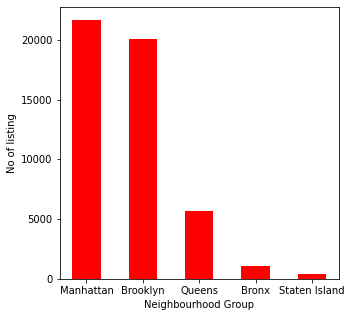

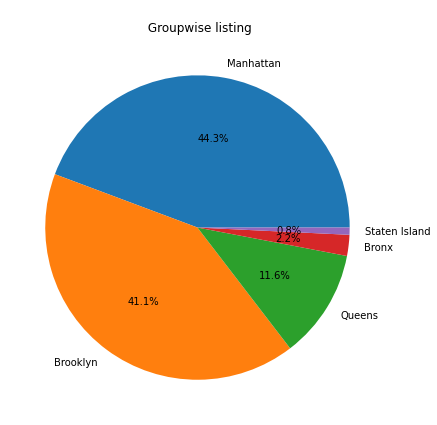

In [11]:
# Finding no. of Airbnb listing neighbourhood_group wise. 
groupwise_listing = airbnb_df["neighbourhood_group"].value_counts(sort=True)
plt.figure(figsize=(5,5))
plt.bar(groupwise_listing.index,groupwise_listing, color = 'red', width = 0.5 )
plt.xlabel("Neighbourhood Group")
plt.ylabel("No of listing")
plt.show()

# Showing data percentage wise
plt.figure(figsize=(7,7))
plt.pie(groupwise_listing,labels = groupwise_listing.index, autopct='%1.1f%%' )
plt.title("\n Groupwise listing")
plt.show()

Result:
1. Manhatten & Brooklyn are having high no. of listing.
2. Staten island and Bronx have low no. of listing.

Inference:
1. If I want to do advertisement or marketing for selling flats I will focus on Manhatten and Brooklyn.


# 2. Average cost price of different neighbourhood group.


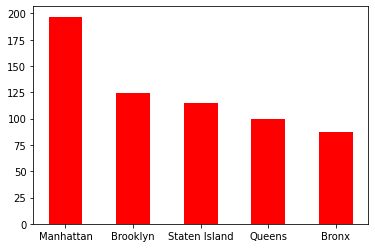

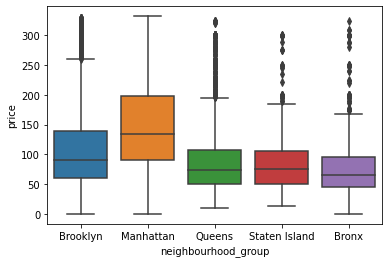

In [12]:
# Finding average cost price of different neighbourhood group.
average_price = airbnb_df.groupby('neighbourhood_group')['price'].mean()
average_price.sort_values(ascending = False, inplace = True)
plt.bar( average_price.index, average_price, color = 'red', width = 0.5 )
plt.show()

# Plotting price density distribution for 90 percent of listing 

price_90percent = airbnb_df.groupby('neighbourhood_group')['price'].quantile(.9)
listing = airbnb_df[airbnb_df.price< max(price_90percent)]
sns.boxplot(x = listing['neighbourhood_group'], y = listing['price'])
plt.show()
# Violin graph read.

Result: 
1. Order of costliest neighbourhood group on basis of average price and price distribution 

  => Manhattan > Brooklyn > Staten Island > Queens > Bronx.

2. Staten Island was having least no. of listing but it is not the cheapest.

Inference:

1. If I am doing job I will first prefer to look for job in Bronx so that maximum saving can be done.
2. From perpective of purchasing property  I will prefer Queens as it is having property listing and mean price for renting is not to high thus cost of buying property will be low.


# 3. Room type preference in NYC

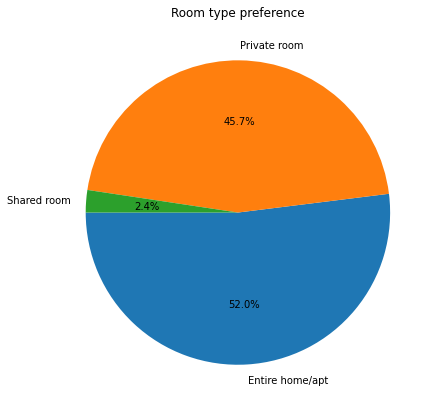

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


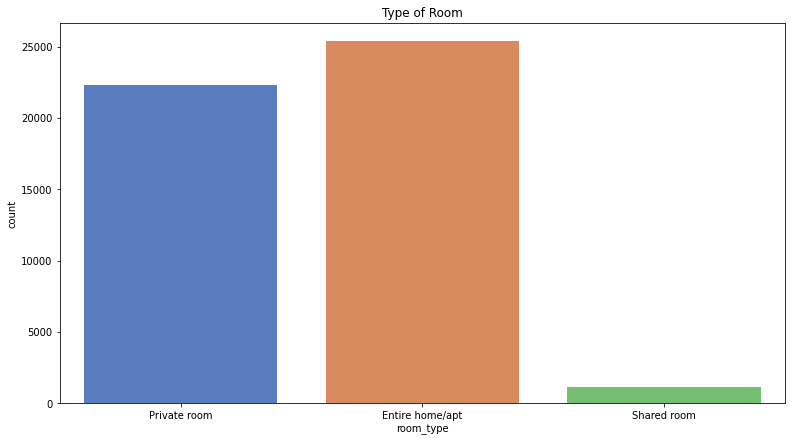

In [13]:
# Q. In NYC which type of room is most preferred?
plt.figure(figsize=(13,7))
plt.title("Room type preference")
plt.pie(airbnb_df.room_type.value_counts(), labels = airbnb_df.room_type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()
# Histogram
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(airbnb_df.room_type, palette="muted")
plt.show()

# 4. Room type according to neighbourhood group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


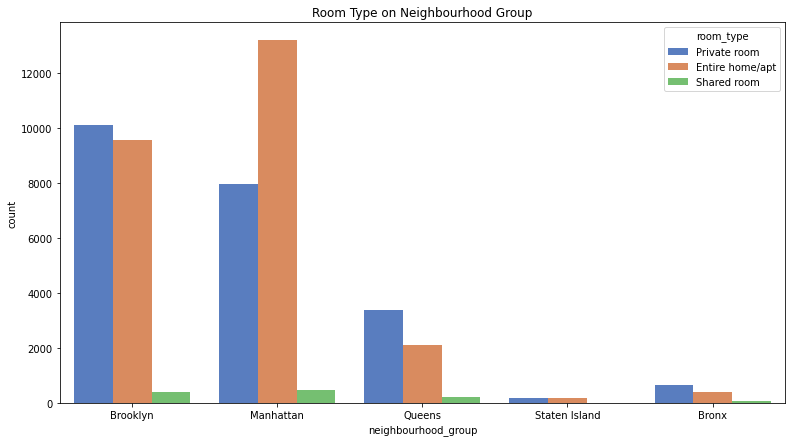

In [14]:
# Q In each neighbourhood group type which room type is most preferred?
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type, palette="muted")
plt.show()

#5. Revenue generated by property

In [15]:
#Revenue generated by different property
airbnb_df["revenue_generated"] = (365-airbnb_df["availability_365"]) * airbnb_df["price"]
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue_generated
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,2250
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,15219
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,29200


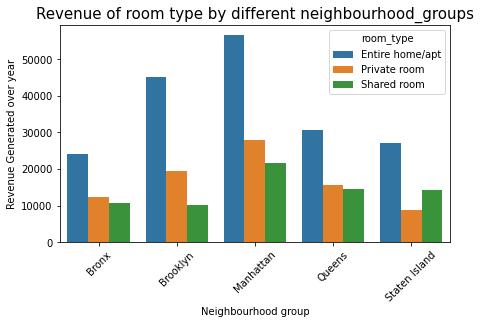

In [16]:
mean_revenue = airbnb_df.groupby(["neighbourhood_group","room_type"])["revenue_generated"].mean().reset_index(name="revenue_generated")
plt.figure(figsize=(7,4))
sns.barplot(x='neighbourhood_group', y="revenue_generated",hue ='room_type', data=mean_revenue)
plt.xticks(rotation = 45,size =10)

plt.title('Revenue of room type by different neighbourhood_groups', size = 15)
plt.xlabel('Neighbourhood group')
plt.ylabel('Revenue Generated over year')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend


Inference:

As we can see that in every neighbourhood "Entire home" has generated most revenue. So buying a property "Entire home" and renting it, is a profitable business irrespective of neighbourhood type.